In [1]:
# import the libraries
import pandas as pd
import seaborn as sns
# import cars dataset - this is downloaded from kaggle
# here dataframe by the name 'cars’ is created 
cars=pd.read_csv('CARS.csv')
# show how many rows and cols in the dataset
print(cars.shape)
# dataset information 
cars.info()
# to get only column names 
print (cars.columns)
# display top 5 rows 
cars.head()
# display top 10 rows 
cars.head(10)
# display 1ast 5 rows 
cars.tail()

(429, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         429 non-null    object 
 1   Model        429 non-null    object 
 2   Type         429 non-null    object 
 3   Origin       429 non-null    object 
 4   DriveTrain   429 non-null    object 
 5   MSRP         429 non-null    object 
 6   Invoice      429 non-null    object 
 7   EngineSize   429 non-null    float64
 8   Cylinders    427 non-null    float64
 9   Horsepower   429 non-null    int64  
 10  MPG_City     429 non-null    int64  
 11  MPG_Highway  429 non-null    int64  
 12  Weight       429 non-null    int64  
 13  Wheelbase    429 non-null    int64  
 14  Length       429 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.4+ KB
Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders',

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180
427,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5.0,208,20,27,3823,109,186
428,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5.0,208,20,27,3823,109,186


In [2]:
# remove unimportant cols: MSRP, Invoice 
cars = cars.drop(['MSRP', 'Invoice'], axis=1)
# remove duplicate rows if any 
#keep first row and remove other duplicate rows of that row 
cars = cars.drop_duplicates (keep='first')
#To find the total no of rows which are missing value in a column 
cars.isnull().sum()
# remove the rows having missing values (in cy1inders) 
cars.dropna(inplace=True)

In [3]:
# sort the data w.r.t a column -- here we sort on 'MPG_City’
# in descending order 
cars_sort = cars.sort_values (by='MPG_City', ascending=False)
# iloc[] ->gives integer location based indexing/ selection
cars.iloc[[0,2,4], [1,3,5]]

,Model,Origin,EngineSize
0,MDX,Asia,3.5
2,TSX 4dr,Asia,2.4
4,3.5 RL 4dr,Asia,3.5


In [4]:
# select first 5 rows in MPG_City column using iloc) and
 #1oc()
x=cars.iloc[0:5,8]
x
x=cars.loc[0:5,'MPG_City']
x
# To select only numeric type of columns, we can give their
# names or datatypes as :
cars1=cars[['EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway','Weight', 'Wheelbase', 'Length']]
cars1
cars1 = cars.select_dtypes(include=['float64', 'int64']) 
cars1

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,3.5,6.0,265,17,23,4451,106,189
1,2.0,4.0,200,24,31,2778,101,172
2,2.4,4.0,200,22,29,3230,105,183
3,3.2,6.0,270,20,28,3575,108,186
4,3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...
423,2.4,5.0,197,21,28,3450,105,186
424,2.3,5.0,242,20,26,3450,105,186
425,2.9,6.0,268,19,26,3653,110,190
426,1.9,4.0,170,22,29,2822,101,180


In [7]:
#summary statistics
# if  std is 0, that column should be removed from analysis
cars.describe ()

# find correlations between all columns 
#cars.corr(method ='pearson')

# find correlations between all columns and 'MPC_city'.
#cars.corr(method ='pearson')['MPG_City'] 

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,3.205634,5.807512,215.877934,20.070423,26.854460,3580.474178,108.164319,186.420188
std,1.103520,1.558443,71.991040,5.248616,5.752335,759.870073,8.330030,14.366611
min,1.400000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.400000,4.000000,165.000000,17.000000,24.000000,3111.250000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3476.000000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.750000,29.000000,3979.250000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


<Axes: xlabel='Length', ylabel='MPG_City'>

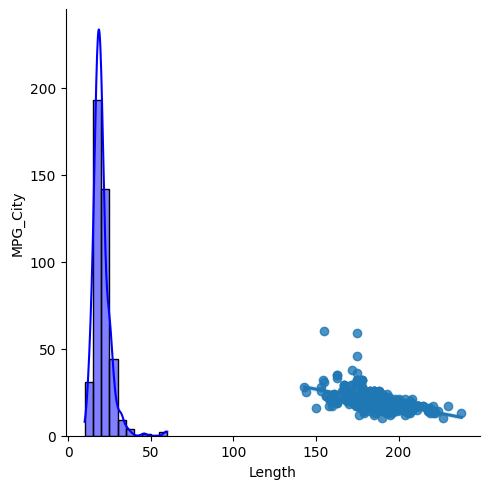

In [8]:
# display a distribution plot with kernal density
#estimate line. Take density MPG_City on x axis.
sns.displot (data=cars, x='MPG_City', bins=10, kde=True, color='blue')

#draw regression plot between Length of the car and mileage in city 
sns.regplot (x='Length', y='MPG_City', data=cars)


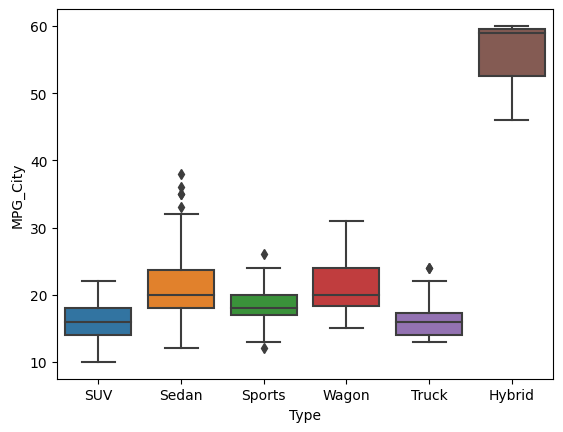

In [10]:
# box plots can be drawn only for categorical variables
# SUV gives less mileage and Hybrid gives more mileage 
box1=sns.boxplot (x='Type', y='MPG_City', data=cars)

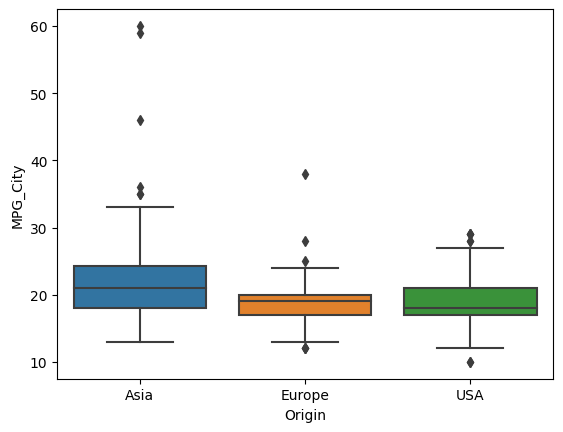

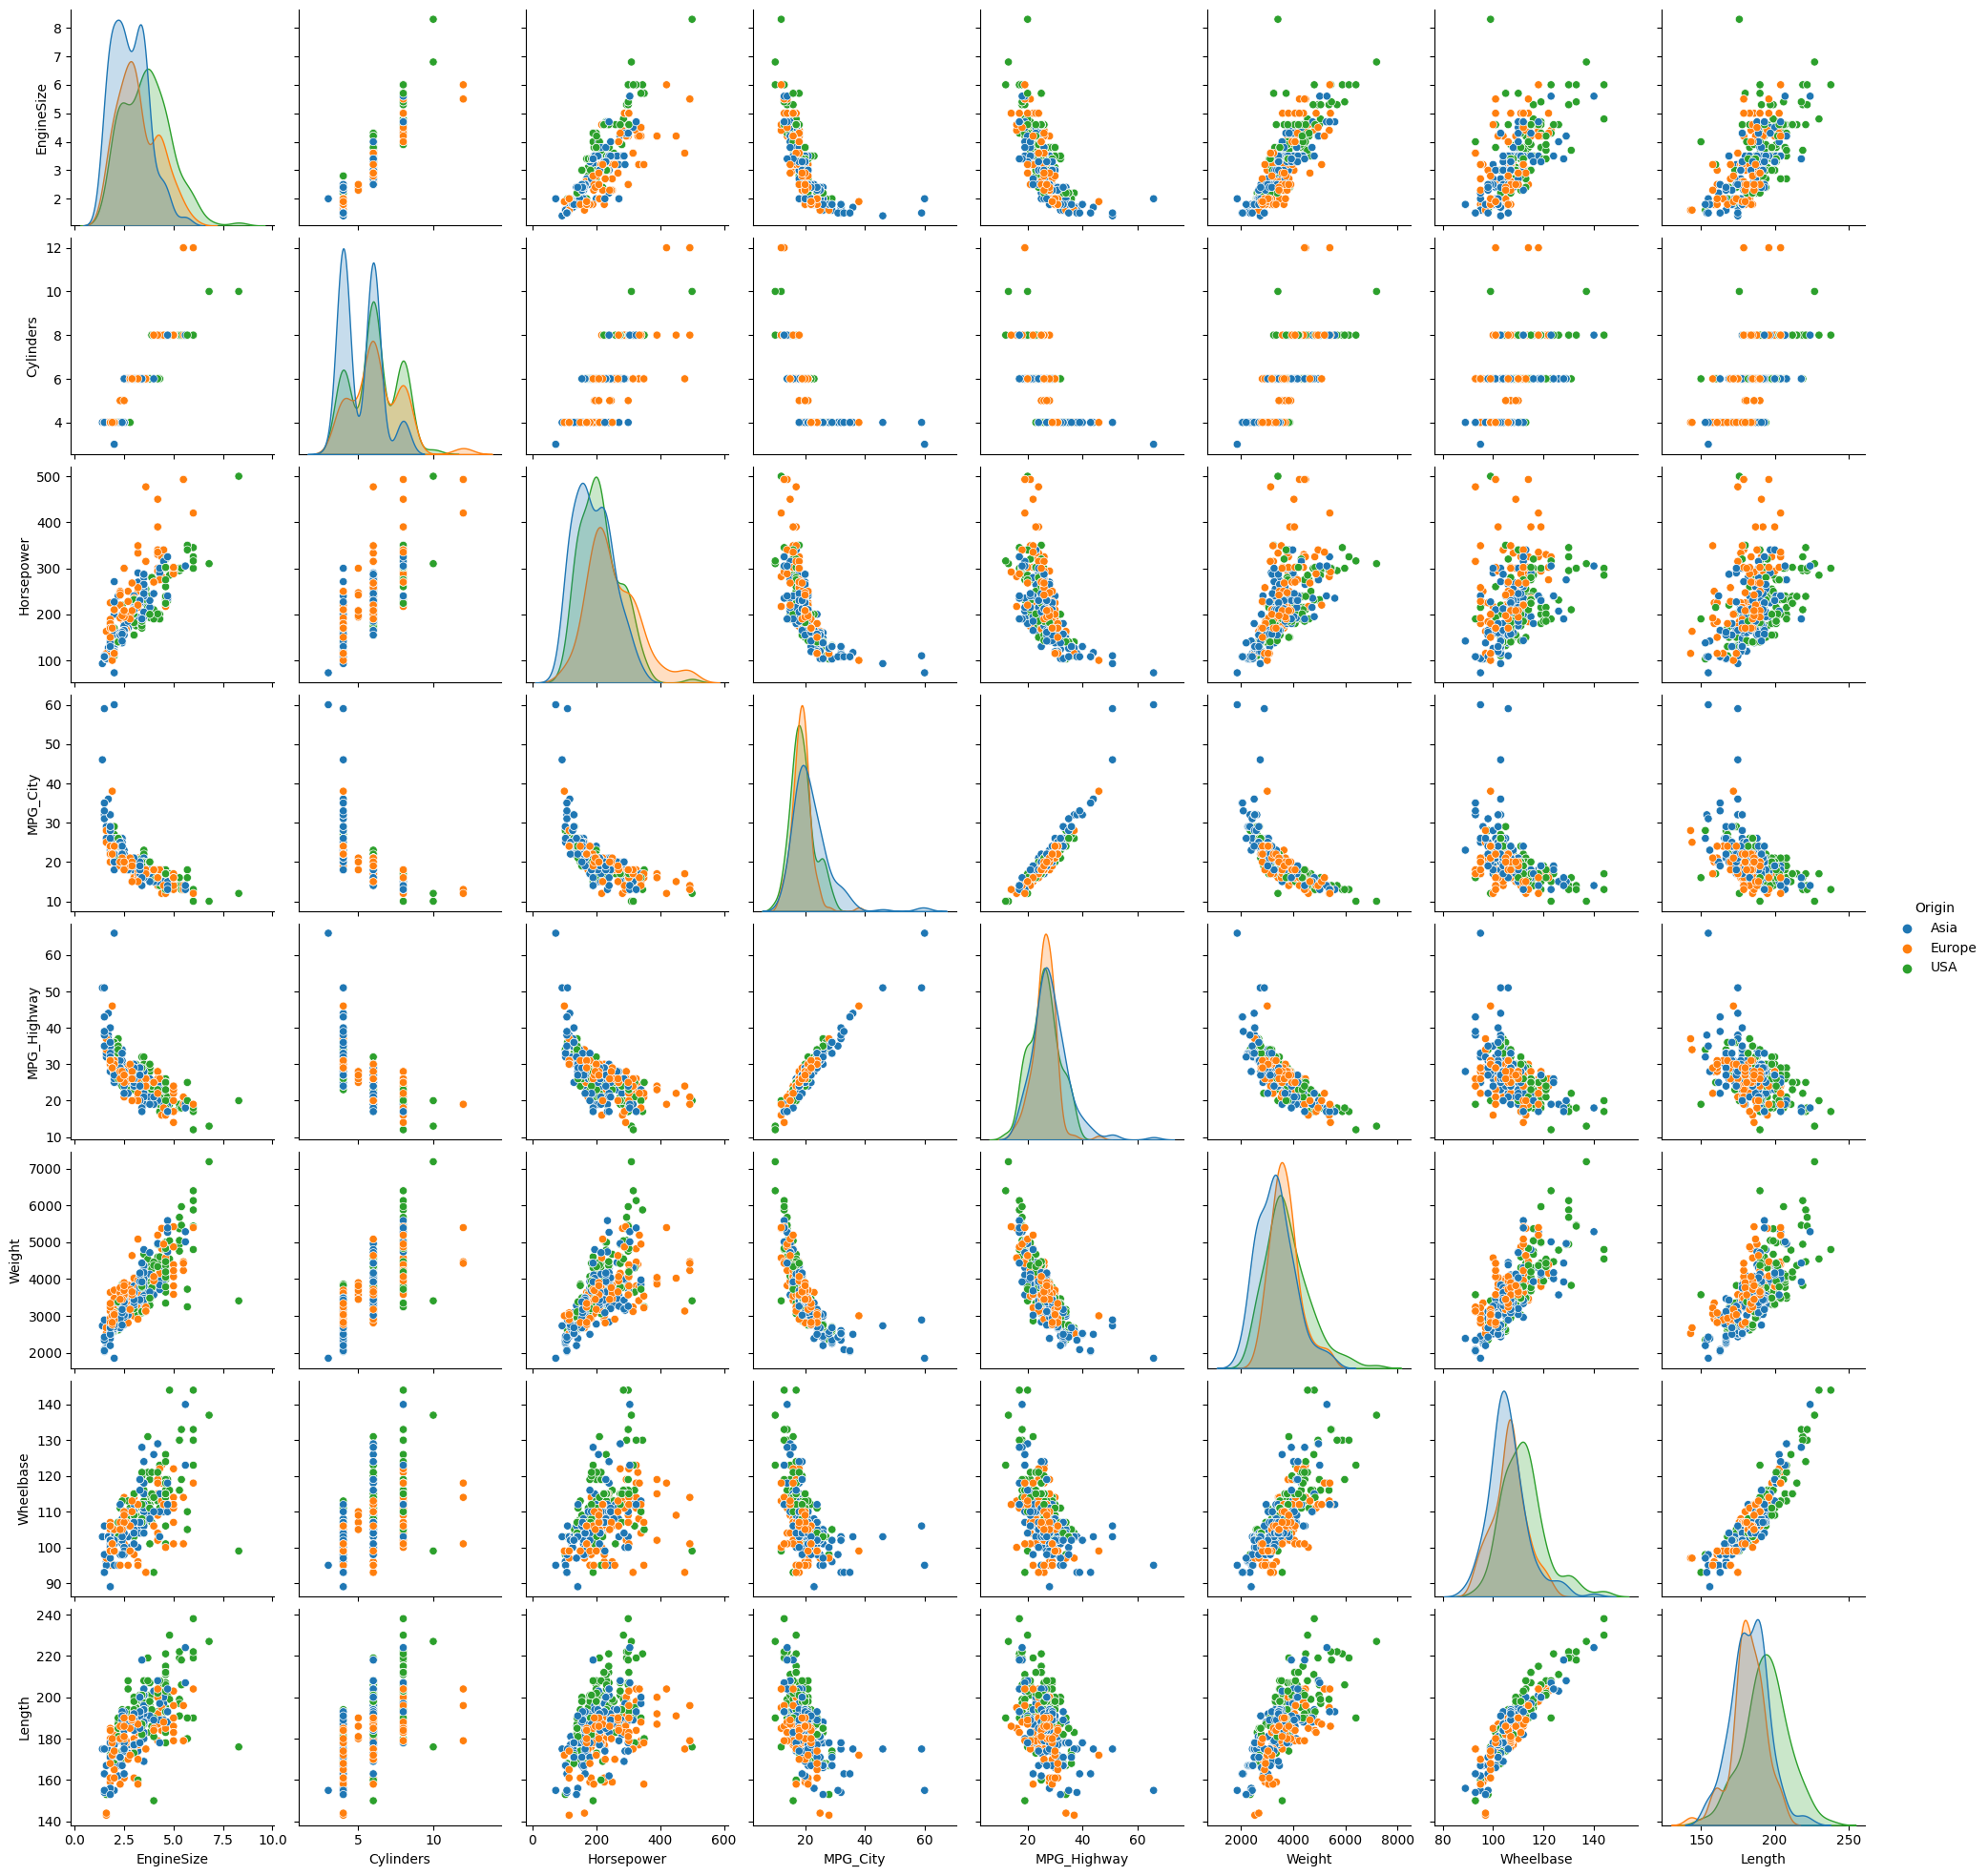

In [11]:

# The origin of car is Asia gives slightly more mileage 
box2=sns.boxplot (x='Origin', y='MPG_City', data=cars)
# draw pair plots between all columns
sns.pairplot(cars, hue='Origin')